In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, metrics, neighbors 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x, y) = datasets.make_classification(n_samples=500, n_features=2, 
                                                      n_informative=2, n_classes=4, 
                                                      n_redundant=0, 
                                                      n_clusters_per_class=1, 
                                                      random_state=42)

In [3]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

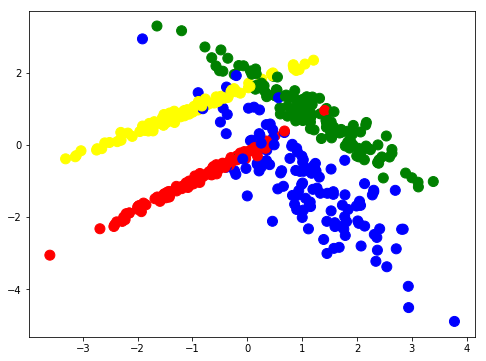

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(map(lambda t: t[0], x), map(lambda t: t[1], x), 
              c=y, cmap=colors, s=100)

In [5]:
(train_data, test_data, 
 train_labels, test_labels) = model_selection.train_test_split(x, y, 
                                                               test_size=0.3,
                                                               random_state=42)

In [6]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, k, 
                          colors=colors, light_colors=light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data k = {}, accuracy={:.2f}'.format(k, metrics.accuracy_score(train_labels, 
                                                                          estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    xx, yy = get_meshgrid(test_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap=light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data k = {}, accuracy={:.2f}'.format(k, metrics.accuracy_score(test_labels, 
                                                                         estimator.predict(test_data))))

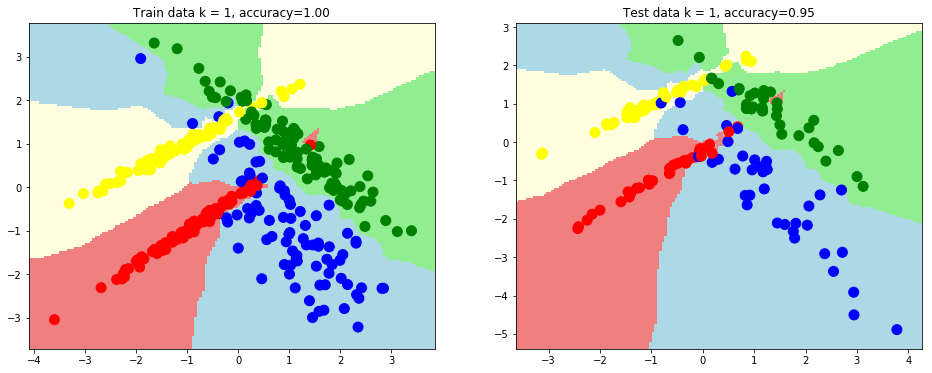

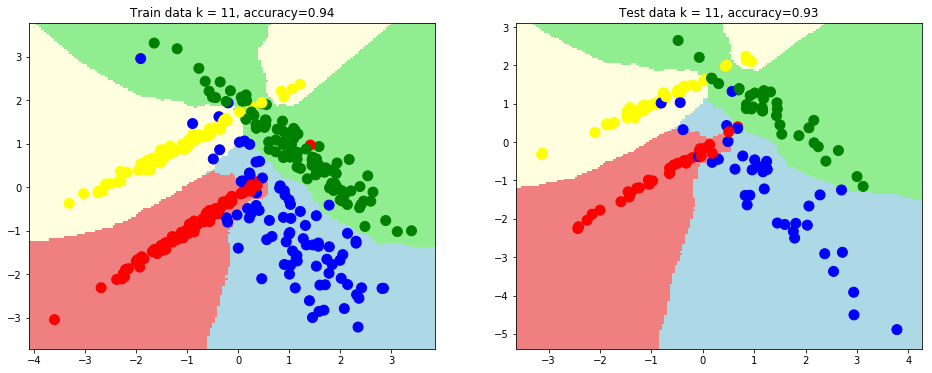

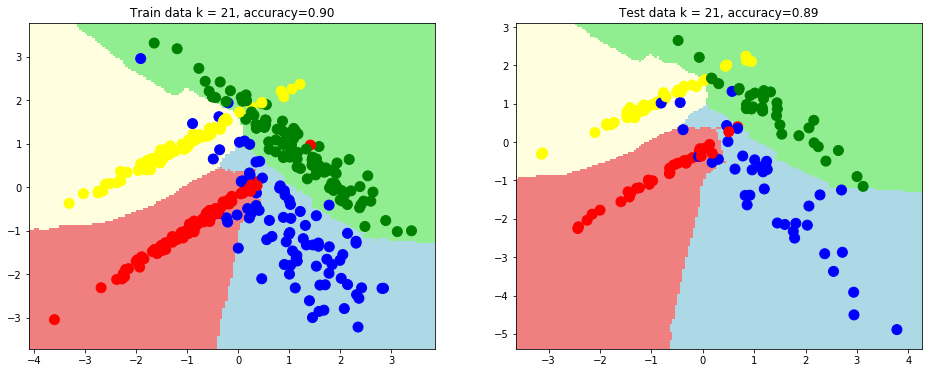

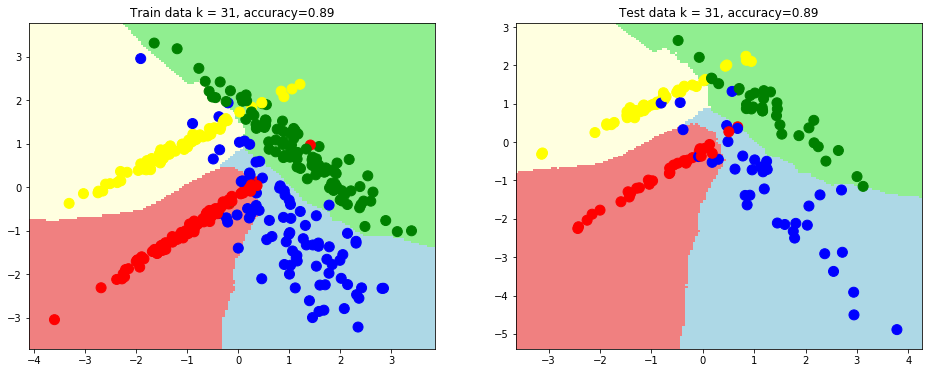

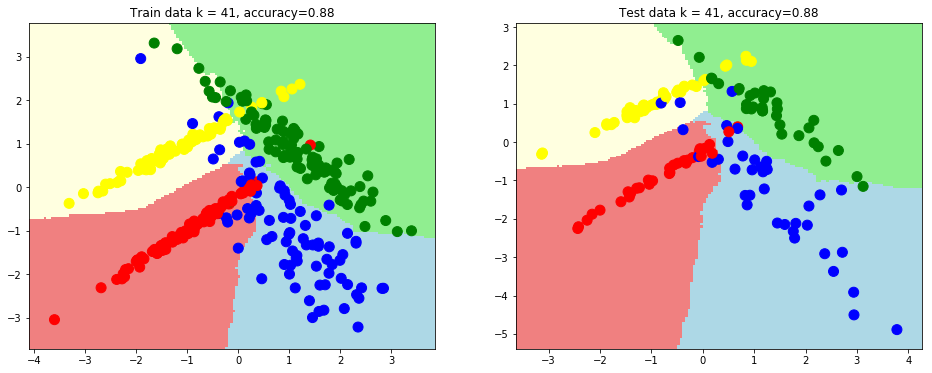

In [7]:
for k in range(50)[1::10]:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)

    plot_decision_surface(estimator, train_data, train_labels, 
                          test_data, test_labels, k)

In [8]:
max_k =50
accuracies = np.zeros(max_k, dtype='float64')
cv = model_selection.StratifiedKFold(n_splits=5)
for k in range(max_k + 1)[1:]:
    estimator = neighbors.KNeighborsClassifier(n_neighbors=k)
    accuracies[k - 1] = model_selection.cross_val_score(estimator, 
                                                        x, y, cv=cv).mean()

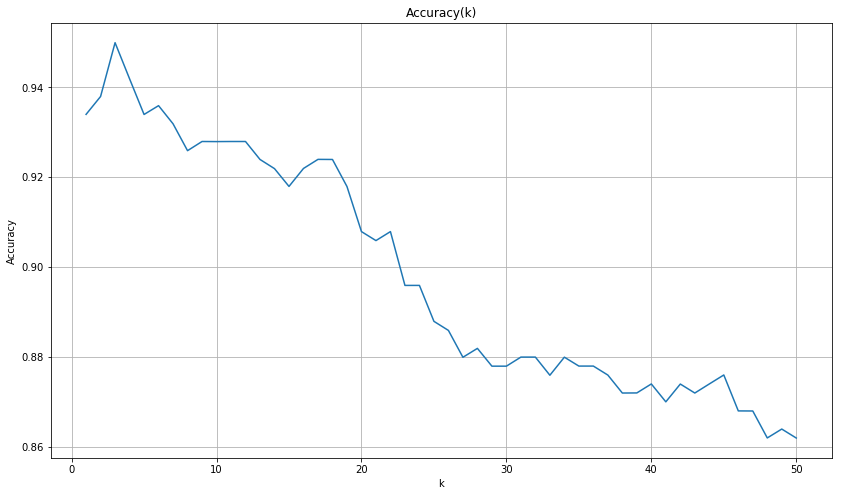

In [9]:
plt.figure(figsize=(14, 8))
plt.title('Accuracy(k)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(range(max_k + 1)[1:], accuracies)
plt.show()

In [10]:
print 'best k is', accuracies.argmax() + 1

best k is 3
